In [1]:
# Import dependencies 
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
# Creating filepaths to csv
filepath_beers = os.path.join('Resources/beers.csv')
filepath_breweries = os.path.join('Resources/breweries.csv')
filepath_reviews = os.path.join('Resources/reviews.csv')

In [3]:
# Creating dataframe for beers and filtering for the US
beers_df = pd.read_csv(filepath_beers)
beers_df = beers_df[beers_df.country_beer == 'US']
beers_df

,beer_id,beer_name,brewery_id,state_beer,country_beer,style,availability,abv,beer_notes,retired
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,7.3,No notes at this time.,f
2,214879,Scottish Right,44306,IN,US,Scottish Ale,Year-round,4.0,No notes at this time.,t
3,320009,MegaMeow Imperial Stout,4378,WA,US,American Imperial Stout,Winter,8.7,Every time this year,f
4,246438,Peaches-N-Cream,44617,PA,US,American Cream Ale,Rotating,5.1,No notes at this time.,f
6,108605,Icon Sender,22598,CA,US,American Lager,Year-round,5.6,No notes at this time.,f
...,...,...,...,...,...,...,...,...,...,...
358865,258269,Brewers Select #019 High Pressure Lager,28281,WA,US,American Lager,Rotating,4.5,No notes at this time.,f
358867,146613,American Pale Ale,36926,WI,US,American Pale Ale (APA),Rotating,NaN,No notes at this time.,t
358870,187618,RIPTA,34665,RI,US,Belgian Tripel,Rotating,9.5,No notes at this time.,f
358871,283124,Rumble Fish,29238,MI,US,American Imperial IPA,Rotating,8.3,No notes at this time.,f


In [4]:
# Creating dataframe for breweries
breweries_df = pd.read_csv(filepath_breweries)
breweries_df = breweries_df[breweries_df.country_brewery == 'US']
breweries_df

,brewery_id,brewery_name,city,state_brewery,country_brewery,brewery_notes,types
1,32541,Coachella Valley Brewing Co,Thousand Palms,CA,US,No notes at this time.,"Brewery, Bar, Beer-to-go"
2,44736,Beef 'O' Brady's,Plant City,FL,US,No notes at this time.,"Bar, Eatery"
3,23372,Broadway Wine Merchant,Oklahoma City,OK,US,No notes at this time.,Store
5,31561,Teddy's Tavern,Seattle,WA,US,No notes at this time.,"Bar, Beer-to-go"
9,41278,The Other End,Destin,FL,US,No notes at this time.,"Bar, Eatery"
...,...,...,...,...,...,...,...
50338,3124,Abington Ale House & Grille,Abington,MA,US,No notes at this time.,"Bar, Eatery"
50339,30980,Zipline Brewing Co,Lincoln,NE,US,No notes at this time.,"Brewery, Bar, Beer-to-go"
50341,24375,The Copper Kettle,Soldotna,AK,US,No notes at this time.,Homebrew
50345,20047,Forest City Wines & Spirits,Middletown,CT,US,No notes at this time.,Store


In [5]:
# Creating dataframe for reviews
reviews_df = pd.read_csv(filepath_reviews)
reviews_df

,beer_id,username,date,text,look,smell,taste,feel,overall,score
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03
1,125646,_dirty_,2017-12-21,,4.50,4.50,4.50,4.50,4.50,4.50
2,125646,CJDUBYA,2017-12-21,,4.75,4.75,4.75,4.75,4.75,4.75
3,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58
4,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31
...,...,...,...,...,...,...,...,...,...,...
9073123,104824,CTJman,2014-06-08,,NaN,NaN,NaN,NaN,NaN,4.00
9073124,104824,IMSPEAKNOENGLISH,2014-06-06,,NaN,NaN,NaN,NaN,NaN,5.00
9073125,104824,twizzard,2014-06-05,,NaN,NaN,NaN,NaN,NaN,5.00
9073126,104824,bootdown21,2014-06-04,,NaN,NaN,NaN,NaN,NaN,4.50


In [6]:
# Merge beer and brewery datasets
beer_data_complete_df = pd.merge(beers_df, breweries_df, how="left", on=["brewery_id", "brewery_id"])
beer_data_complete_df

,beer_id,beer_name,brewery_id,state_beer,country_beer,style,availability,abv,beer_notes,retired,brewery_name,city,state_brewery,country_brewery,brewery_notes,types
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,7.3,No notes at this time.,f,Main Street Brewery,Pleasanton,CA,US,No notes at this time.,"Brewery, Bar, Eatery"
1,214879,Scottish Right,44306,IN,US,Scottish Ale,Year-round,4.0,No notes at this time.,t,Byway Brewing,Hammond,IN,US,No notes at this time.,"Brewery, Bar, Eatery, Beer-to-go"
2,320009,MegaMeow Imperial Stout,4378,WA,US,American Imperial Stout,Winter,8.7,Every time this year,f,Georgetown Brewing Company,Seattle,WA,US,No notes at this time.,Brewery
3,246438,Peaches-N-Cream,44617,PA,US,American Cream Ale,Rotating,5.1,No notes at this time.,f,Mad Princes Brewing,Doylestown,PA,US,No notes at this time.,"Brewery, Bar, Beer-to-go"
4,108605,Icon Sender,22598,CA,US,American Lager,Year-round,5.6,No notes at this time.,f,Cismontane Brewing Company,Rancho Santa Margarita,CA,US,No notes at this time.,"Brewery, Bar, Beer-to-go"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265456,258269,Brewers Select #019 High Pressure Lager,28281,WA,US,American Lager,Rotating,4.5,No notes at this time.,f,Kulshan Brewing Company,Bellingham,WA,US,No notes at this time.,"Brewery, Bar, Beer-to-go"
265457,146613,American Pale Ale,36926,WI,US,American Pale Ale (APA),Rotating,NaN,No notes at this time.,t,Tornado Brewing Company,Menomonee Falls,WI,US,Beers are brewed at Woodman Brewery in Woodman...,"Brewery, Bar, Eatery"
265458,187618,RIPTA,34665,RI,US,Belgian Tripel,Rotating,9.5,No notes at this time.,f,Brutopia Brewery,Cranston,RI,US,No notes at this time.,"Brewery, Bar, Eatery, Beer-to-go"
265459,283124,Rumble Fish,29238,MI,US,American Imperial IPA,Rotating,8.3,No notes at this time.,f,Ore Dock Brewing Company,Marquette,MI,US,No notes at this time.,"Brewery, Bar, Beer-to-go"


In [7]:
# Merge beer_final and reviews dataset
beer_reviews_complete_df = pd.merge(reviews_df, beer_data_complete_df, how="left", on=["beer_id", "beer_id"])
beer_reviews_complete_df

,beer_id,username,date,text,look,smell,taste,feel,overall,score,...,availability,abv,beer_notes,retired,brewery_name,city,state_brewery,country_brewery,brewery_notes,types
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03,...,Limited (brewed once),10.8,2016 - Five Year Anniversary Imperial Stout,t,Four String Brewing Company,Columbus,OH,US,No notes at this time.,"Brewery, Bar"
1,125646,_dirty_,2017-12-21,,4.50,4.50,4.50,4.50,4.50,4.50,...,Rotating,8.2,We constructed this beer around hops we curren...,f,Tree House Brewing Company,Charlton,MA,US,"We offer retail sales of our fresh, carefully ...","Brewery, Bar, Beer-to-go"
2,125646,CJDUBYA,2017-12-21,,4.75,4.75,4.75,4.75,4.75,4.75,...,Rotating,8.2,We constructed this beer around hops we curren...,f,Tree House Brewing Company,Charlton,MA,US,"We offer retail sales of our fresh, carefully ...","Brewery, Bar, Beer-to-go"
3,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58,...,Rotating,8.2,We constructed this beer around hops we curren...,f,Tree House Brewing Company,Charlton,MA,US,"We offer retail sales of our fresh, carefully ...","Brewery, Bar, Beer-to-go"
4,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31,...,Rotating,8.2,We constructed this beer around hops we curren...,f,Tree House Brewing Company,Charlton,MA,US,"We offer retail sales of our fresh, carefully ...","Brewery, Bar, Beer-to-go"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9073123,104824,CTJman,2014-06-08,,NaN,NaN,NaN,NaN,NaN,4.00,...,Rotating,13.0,The first batch of Imperial Jones Dog we ever ...,f,Pipeworks Brewing Company,Chicago,IL,US,No notes at this time.,"Brewery, Beer-to-go"
9073124,104824,IMSPEAKNOENGLISH,2014-06-06,,NaN,NaN,NaN,NaN,NaN,5.00,...,Rotating,13.0,The first batch of Imperial Jones Dog we ever ...,f,Pipeworks Brewing Company,Chicago,IL,US,No notes at this time.,"Brewery, Beer-to-go"
9073125,104824,twizzard,2014-06-05,,NaN,NaN,NaN,NaN,NaN,5.00,...,Rotating,13.0,The first batch of Imperial Jones Dog we ever ...,f,Pipeworks Brewing Company,Chicago,IL,US,No notes at this time.,"Brewery, Beer-to-go"
9073126,104824,bootdown21,2014-06-04,,NaN,NaN,NaN,NaN,NaN,4.50,...,Rotating,13.0,The first batch of Imperial Jones Dog we ever ...,f,Pipeworks Brewing Company,Chicago,IL,US,No notes at this time.,"Brewery, Beer-to-go"


In [8]:
beer_reviews_complete_df2 = pd.merge(beer_data_complete_df, reviews_df, how="left", on=["beer_id", "beer_id"])
beer_reviews_complete_df2

,beer_id,beer_name,brewery_id,state_beer,country_beer,style,availability,abv,beer_notes,retired,...,types,username,date,text,look,smell,taste,feel,overall,score
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,7.3,No notes at this time.,f,...,"Brewery, Bar, Eatery",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,214879,Scottish Right,44306,IN,US,Scottish Ale,Year-round,4.0,No notes at this time.,t,...,"Brewery, Bar, Eatery, Beer-to-go",warpig372,2016-04-12,,NaN,NaN,NaN,NaN,NaN,2.50
2,320009,MegaMeow Imperial Stout,4378,WA,US,American Imperial Stout,Winter,8.7,Every time this year,f,...,Brewery,NickThePyro,2018-03-16,,NaN,NaN,NaN,NaN,NaN,4.00
3,246438,Peaches-N-Cream,44617,PA,US,American Cream Ale,Rotating,5.1,No notes at this time.,f,...,"Brewery, Bar, Beer-to-go",rolltide8425,2016-08-27,Exactly what it says it is,NaN,NaN,NaN,NaN,NaN,3.67
4,108605,Icon Sender,22598,CA,US,American Lager,Year-round,5.6,No notes at this time.,f,...,"Brewery, Bar, Beer-to-go",Smarty_Pints,2013-12-29,,NaN,NaN,NaN,NaN,NaN,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7550788,187618,RIPTA,34665,RI,US,Belgian Tripel,Rotating,9.5,No notes at this time.,f,...,"Brewery, Bar, Eatery, Beer-to-go",PhineasMcClintock,2016-02-06,,3.75,3.50,3.75,3.75,3.75,3.69
7550789,187618,RIPTA,34665,RI,US,Belgian Tripel,Rotating,9.5,No notes at this time.,f,...,"Brewery, Bar, Eatery, Beer-to-go",Knapp85,2016-02-06,,4.00,3.75,3.75,4.00,3.75,3.79
7550790,187618,RIPTA,34665,RI,US,Belgian Tripel,Rotating,9.5,No notes at this time.,f,...,"Brewery, Bar, Eatery, Beer-to-go",Jwale73,2015-08-25,From a grower purchased on 8/23/15 and serv...,4.25,4.00,4.00,4.00,4.00,4.02
7550791,283124,Rumble Fish,29238,MI,US,American Imperial IPA,Rotating,8.3,No notes at this time.,f,...,"Brewery, Bar, Beer-to-go",Blackop555,2017-05-23,"Pours light copper. Thick, short, off white...",NaN,NaN,NaN,NaN,NaN,4.29


In [9]:
# Checking if state_beer and state_brewery match
df2 = beer_reviews_complete_df.filter(['state_beer', 'state_brewery'])
df2['match'] = beer_reviews_complete_df['state_beer'] == beer_reviews_complete_df['state_brewery']
df2[beer_reviews_complete_df['state_beer'] == beer_reviews_complete_df['state_brewery']]
df2 = df2[df2.match == False]
df2

,state_beer,state_brewery,match
36,NaN,NaN,False
37,NaN,NaN,False
38,NaN,NaN,False
39,NaN,NaN,False
40,NaN,NaN,False
...,...,...,...
9073041,NaN,NaN,False
9073042,NaN,NaN,False
9073043,NaN,NaN,False
9073044,NaN,NaN,False


In [10]:
#
df2.isna().sum()

state_beer       1584619
state_brewery    1584619
match                  0
dtype: int64

In [11]:
beer_reviews_complete_df = beer_reviews_complete_df[beer_reviews_complete_df.country_beer == 'US']
beer_reviews_complete_df = beer_reviews_complete_df.drop(columns = ['availability', 'beer_notes', 'retired', 'types', 'username', 'date', 'text', 'brewery_notes', 'state_brewery', 'country_brewery'])
beer_reviews_complete_df.head()
beer_reviews_complete_df.isna().sum()

beer_id               0
look            3175576
smell           3175576
taste           3175576
feel            3175576
overall         3175576
score                 0
beer_name             0
brewery_id            0
state_beer        28533
country_beer          0
style                 2
abv              160637
brewery_name          0
city              28533
dtype: int64

In [12]:
# Remember to reset index
beer_reviews_complete_df = beer_reviews_complete_df.dropna()
beer_reviews_complete_df

,beer_id,look,smell,taste,feel,overall,score,beer_name,brewery_id,state_beer,country_beer,style,abv,brewery_name,city
0,271781,4.00,4.00,4.00,4.25,4.00,4.03,Motorbreath Imperial Stout,28094.0,OH,US,American Imperial Stout,10.8,Four String Brewing Company,Columbus
1,125646,4.50,4.50,4.50,4.50,4.50,4.50,Haze,28743.0,MA,US,New England IPA,8.2,Tree House Brewing Company,Charlton
2,125646,4.75,4.75,4.75,4.75,4.75,4.75,Haze,28743.0,MA,US,New England IPA,8.2,Tree House Brewing Company,Charlton
3,125646,4.75,4.75,4.50,4.50,4.50,4.58,Haze,28743.0,MA,US,New England IPA,8.2,Tree House Brewing Company,Charlton
4,125646,4.25,4.50,4.25,4.25,4.25,4.31,Haze,28743.0,MA,US,New England IPA,8.2,Tree House Brewing Company,Charlton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9073095,58482,4.00,3.50,3.50,4.00,3.50,3.58,Verboten,392.0,PA,US,Belgian Pale Ale,5.9,Weyerbacher Brewing Co.,Easton
9073096,58482,3.50,4.00,4.00,3.50,4.00,3.92,Verboten,392.0,PA,US,Belgian Pale Ale,5.9,Weyerbacher Brewing Co.,Easton
9073097,58482,4.00,4.00,3.50,4.00,4.00,3.80,Verboten,392.0,PA,US,Belgian Pale Ale,5.9,Weyerbacher Brewing Co.,Easton
9073110,104824,4.25,4.75,4.25,4.00,4.25,4.35,Barrel Aged The Jones Dog,28178.0,IL,US,American Imperial Stout,13.0,Pipeworks Brewing Company,Chicago


In [13]:
beer_reviews_complete_df.nunique()

beer_id         108398
look                17
smell               17
taste               17
feel                17
overall             17
score              400
beer_name        97727
brewery_id        5370
state_beer          51
country_beer         1
style              110
abv                713
brewery_name      5301
city              2140
dtype: int64

In [14]:
beer_reviews_complete_df['style'].value_counts()

American IPA               607057
American Imperial IPA      433470
American Imperial Stout    324281
American Pale Ale (APA)    225964
American Wild Ale          161876
                            ...  
Russian Kvass                 355
American Brut IPA             240
European Strong Lager         180
Japanese Rice Lager           140
Belgian Faro                   30
Name: style, Length: 110, dtype: int64

In [15]:
beer_reviews_complete_df.loc[beer_reviews_complete_df['style'].str.contains('IPA', case=False), 'style'] = 'Pale Ale'
beer_reviews_complete_df.loc[beer_reviews_complete_df['style'].str.contains('Pale', case=False), 'style'] = 'Pale Ale'
beer_reviews_complete_df.loc[beer_reviews_complete_df['style'].str.contains('APA', case=False), 'style'] = 'Pale Ale'
beer_reviews_complete_df.loc[beer_reviews_complete_df['style'].str.contains('Lager', case=False), 'style'] = 'Lager'
beer_reviews_complete_df.loc[beer_reviews_complete_df['style'].str.contains('Stout', case=False), 'style'] = 'Stout'
beer_reviews_complete_df.loc[beer_reviews_complete_df['style'].str.contains('Dark Ale', case=False), 'style'] = 'Dark Ale'
beer_reviews_complete_df.loc[beer_reviews_complete_df['style'].str.contains('Brown Ale', case=False), 'style'] = 'Brown Ale'
beer_reviews_complete_df.loc[beer_reviews_complete_df['style'].str.contains('Red Ale', case=False), 'style'] = 'Red Ale'
beer_reviews_complete_df.loc[beer_reviews_complete_df['style'].str.contains('Porter', case=False), 'style'] = 'Porter'
beer_reviews_complete_df.loc[beer_reviews_complete_df['style'].str.contains('Wild Ale', case=False), 'style'] = 'Wild Ale'
beer_reviews_complete_df.loc[beer_reviews_complete_df['style'].str.contains('Pilsner', case=False), 'style'] = 'Pilsner'
beer_reviews_complete_df.loc[beer_reviews_complete_df['style'].str.contains('Pilsener', case=False), 'style'] = 'Pilsner'
beer_reviews_complete_df.loc[beer_reviews_complete_df['style'].str.contains('Blonde Ale', case=False), 'style'] = 'Blonde Ale'
beer_reviews_complete_df.loc[beer_reviews_complete_df['style'].str.contains('Strong Ale', case=False), 'style'] = 'Strong Ale'
beer_reviews_complete_df.loc[beer_reviews_complete_df['style'].str.contains('Dark Mild Ale', case=False), 'style'] = 'Dark Ale'
beer_reviews_complete_df.loc[beer_reviews_complete_df['style'].str.contains('Black Ale', case=False), 'style'] = 'Dark Ale'
beer_reviews_complete_df.loc[beer_reviews_complete_df['style'].str.contains('Barleywine', case=False), 'style'] = 'Barleywine'
beer_reviews_complete_df.loc[beer_reviews_complete_df['style'].str.contains('Saison', case=False), 'style'] = 'Farmhouse Ale'
beer_reviews_complete_df.loc[beer_reviews_complete_df['style'].str.contains('Farmhouse Ale', case=False), 'style'] = 'Farmhouse Ale'
beer_reviews_complete_df.loc[beer_reviews_complete_df['style'].str.contains('Lambic', case=False), 'style'] = 'Wild Ale'
beer_reviews_complete_df.loc[beer_reviews_complete_df['style'].str.contains('Roggenbier', case=False), 'style'] = 'Rye Beer'
beer_reviews_complete_df.loc[beer_reviews_complete_df['style'].str.contains('Faro', case=False), 'style'] = 'Wild Ale'
beer_reviews_complete_df.loc[beer_reviews_complete_df['style'].str.contains('Eisbock', case=False), 'style'] = 'Lager'
beer_reviews_complete_df.loc[beer_reviews_complete_df['style'].str.contains('Sahti', case=False), 'style'] = 'Farmhouse Ale'
beer_reviews_complete_df.loc[beer_reviews_complete_df['style'].str.contains('dortmunder', case=False), 'style'] = 'Lager'
beer_reviews_complete_df.loc[beer_reviews_complete_df['style'].str.contains('kellerbier', case=False), 'style'] = 'Lager'
beer_reviews_complete_df.loc[beer_reviews_complete_df['style'].str.contains('Gueuze', case=False), 'style'] = 'Wild Ale'
beer_reviews_complete_df.loc[beer_reviews_complete_df['style'].str.contains('Wheatwine Ale', case=False), 'style'] = 'Wheatwine Ale'
beer_reviews_complete_df.loc[beer_reviews_complete_df['style'].str.contains('Dark Wheat Ale', case=False), 'style'] = 'Dark Ale'

In [16]:
beer_style_counts = beer_reviews_complete_df['style'].value_counts()
beer_style_counts

Pale Ale                                       1558624
Stout                                           651947
Porter                                          193854
Wild Ale                                        169536
Farmhouse Ale                                   158249
Lager                                           137490
Red Ale                                         120564
Brown Ale                                        95212
Dark Ale                                         89015
Barleywine                                       87464
Fruit and Field Beer                             73989
Strong Ale                                       70925
Pilsner                                          68631
Belgian Witbier                                  53223
Pumpkin Beer                                     43106
Blonde Ale                                       42886
Berliner Weisse                                  40518
German Märzen / Oktoberfest                      36546
Belgian Tr

(0.0, 1000000.0)

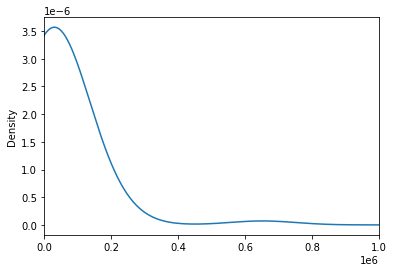

In [17]:
beer_style_counts.plot.density()
plt.xlim(left=0, right=1000000)

In [18]:
replace_beer_styles = list(beer_style_counts[beer_style_counts < 10000].index)

# Replace in dataframe
for beer_style in replace_beer_styles:
    beer_reviews_complete_df['style'] = beer_reviews_complete_df['style'].replace(beer_style,"Other")
    
# Check to make sure binning was successful
beer_reviews_complete_df['style'].value_counts()



Pale Ale                                       1558624
Stout                                           651947
Porter                                          193854
Wild Ale                                        169536
Farmhouse Ale                                   158249
Lager                                           137490
Red Ale                                         120564
Brown Ale                                        95212
Dark Ale                                         89015
Barleywine                                       87464
Other                                            85720
Fruit and Field Beer                             73989
Strong Ale                                       70925
Pilsner                                          68631
Belgian Witbier                                  53223
Pumpkin Beer                                     43106
Blonde Ale                                       42886
Berliner Weisse                                  40518
German Mär

In [4]:
beer_reviews_complete_df.to_csv('Desktop\beers_reviews_complete_df.csv')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (Temp/ipykernel_1764/1111392510.py, line 1)

In [19]:
le = LabelEncoder()
beer_reviews_complete_encoded_df = beer_reviews_complete_df.copy()
beer_reviews_complete_encoded_df['style_encoded'] = le.fit_transform(beer_reviews_complete_encoded_df['style']) 
beer_reviews_complete_encoded_df['state_encoded'] = le.fit_transform(beer_reviews_complete_encoded_df['state_beer']) 
beer_reviews_complete_encoded_df.head()

,beer_id,look,smell,taste,feel,overall,score,beer_name,brewery_id,state_beer,country_beer,style,abv,brewery_name,city,style_encoded,state_encoded
0,271781,4.00,4.00,4.00,4.25,4.00,4.03,Motorbreath Imperial Stout,28094.0,OH,US,Stout,10.8,Four String Brewing Company,Columbus,36,35
1,125646,4.50,4.50,4.50,4.50,4.50,4.50,Haze,28743.0,MA,US,Pale Ale,8.2,Tree House Brewing Company,Charlton,28,19
2,125646,4.75,4.75,4.75,4.75,4.75,4.75,Haze,28743.0,MA,US,Pale Ale,8.2,Tree House Brewing Company,Charlton,28,19
3,125646,4.75,4.75,4.50,4.50,4.50,4.58,Haze,28743.0,MA,US,Pale Ale,8.2,Tree House Brewing Company,Charlton,28,19
4,125646,4.25,4.50,4.25,4.25,4.25,4.31,Haze,28743.0,MA,US,Pale Ale,8.2,Tree House Brewing Company,Charlton,28,19


In [20]:
beer_reviews_complete_encoded_df.nunique()

beer_id          108398
look                 17
smell                17
taste                17
feel                 17
overall              17
score               400
beer_name         97727
brewery_id         5370
state_beer           51
country_beer          1
style                40
abv                 713
brewery_name       5301
city               2140
style_encoded        40
state_encoded        51
dtype: int64

<Figure size 792x1296 with 0 Axes>

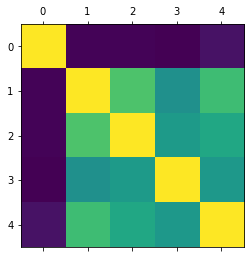

In [21]:
fig = plt.figure(figsize = (11,18))
plt.matshow(beer_reviews_complete_encoded_df[['abv', 'taste', 'feel', 'look', 'smell']].corr())
plt.show()

In [22]:
corr_df = beer_reviews_complete_encoded_df[['abv', 'taste', 'feel', 'look', 'smell']].corr()
corr_df.style.background_gradient(cmap = 'coolwarm')

,abv,taste,feel,look,smell
abv,1.000000,0.289365,0.289891,0.282073,0.316402
taste,0.289365,1.000000,0.799395,0.641614,0.775764
feel,0.289891,0.799395,1.000000,0.672654,0.709891
look,0.282073,0.641614,0.672654,1.000000,0.663510
smell,0.316402,0.775764,0.709891,0.663510,1.000000


In [23]:
beer_reviews_complete_encoded_df['taste x feel'] = beer_reviews_complete_encoded_df['taste'] * beer_reviews_complete_encoded_df['feel']
beer_reviews_complete_encoded_df['taste x smell'] = beer_reviews_complete_encoded_df['taste'] * beer_reviews_complete_encoded_df['smell'] 

<AxesSubplot:>

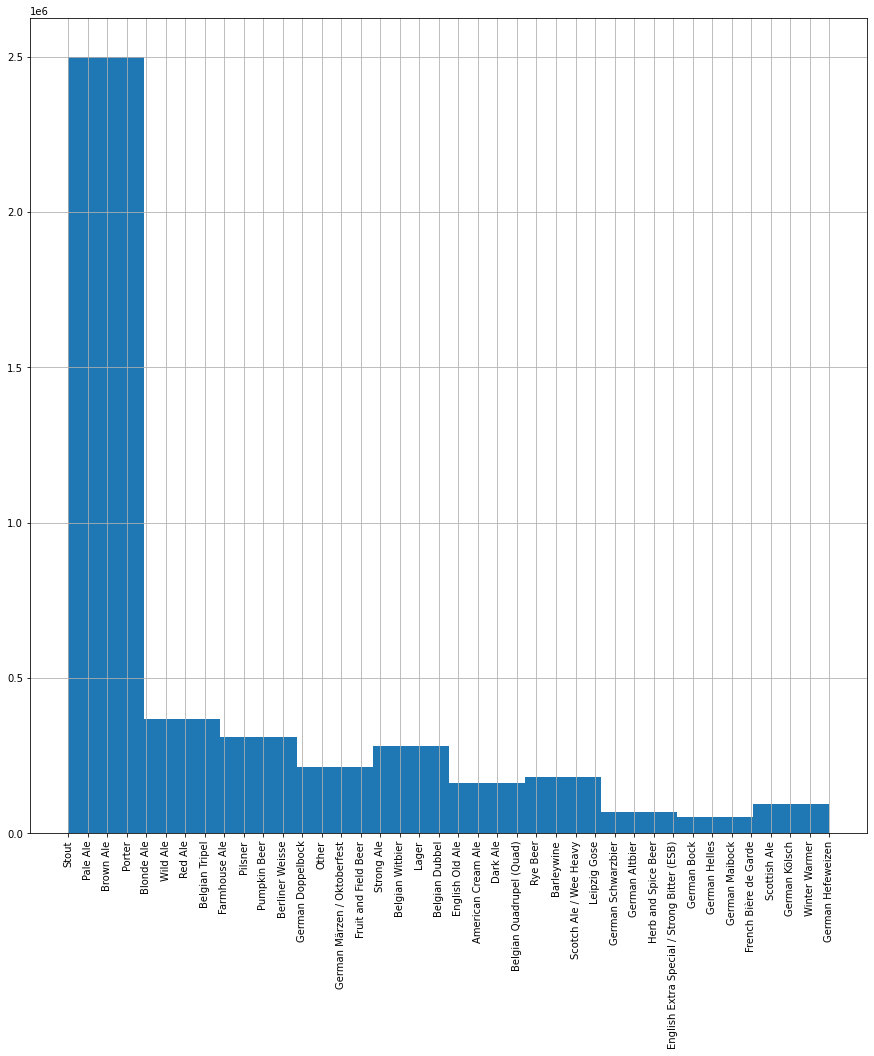

In [24]:
beer_reviews_complete_encoded_df['style'].hist(figsize=(15,15), xrot=90)

In [25]:
# Stratified Sampling
beer_styles = beer_reviews_complete_encoded_df['style'].unique().tolist()
sample_size_per_style = 11100
df_stratified = beer_reviews_complete_encoded_df[beer_reviews_complete_encoded_df["style"] == "Does not exist"]

for styles in beer_styles:
    df_sample  = beer_reviews_complete_encoded_df[beer_reviews_complete_encoded_df["style"] == styles]
    df_sample = df_sample.sample(n = sample_size_per_style)
    df_stratified = df_sample.append(df_stratified)

df_stratified.to_csv("Resources/Test.csv")

In [26]:
# Encoding beer styles
X = df_stratified.copy()
X = X.filter(['state_encoded', 'abv', 'look', 'smell', 'taste', 'feel'], axis = 1)
X.head()

,state_encoded,abv,look,smell,taste,feel
7349519,4,4.8,4.25,3.75,4.00,4.00
7309195,46,5.0,3.50,3.50,3.50,4.00
7683564,4,5.5,3.75,3.75,3.75,3.75
6834166,29,5.2,4.00,4.00,3.75,3.75
7654225,43,5.5,4.50,3.00,2.00,2.00


In [27]:
y = df_stratified["style_encoded"]
y

7349519    18
7309195    18
7683564    18
6834166    18
7654225    18
           ..
8402468    36
4932791    36
8764296    36
7203568    36
4715278    36
Name: style_encoded, Length: 444000, dtype: int32

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(333000, 6)

In [29]:
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=1000,
                                random_state=1)

In [30]:
classifier.fit(X_train, y_train)

c:\Users\mugun\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=1000, random_state=1)

In [31]:
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,1,37
1,38,21
2,38,23
3,20,5
4,38,38
5,38,32
6,26,19
7,12,33
8,31,23
9,19,24


In [32]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.11643243243243243


In [33]:
# Encoding beer styles
X2 = df_stratified.copy()
X2 = X2.filter(['state_encoded', 'abv', 'taste x feel', 'taste x smell'], axis = 1)
X2.head()


y2 = df_stratified["style_encoded"]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, 
                                                    y2, 
                                                    random_state=1, 
                                                    stratify=y2)
X_train2.shape

classifier = LogisticRegression(solver='lbfgs',
                                max_iter=1000,
                                random_state=1)

classifier.fit(X_train2, y_train2)

y_pred2 = classifier.predict(X_test2)
results2 = pd.DataFrame({"Prediction": y_pred2, "Actual": y_test2}).reset_index(drop=True)
results2.head(20)

,Prediction,Actual
0,1,37
1,38,21
2,38,23
3,20,5
4,38,38
5,38,32
6,26,19
7,12,33
8,31,23
9,23,24


In [34]:
print(accuracy_score(y_test2, y_pred2))

0.11254054054054054


In [35]:
# Encoding beer styles
X3 = df_stratified.copy()
X3 = X3.filter(['state_encoded', 'abv', 'taste x feel'], axis = 1)
X3.head()


y3 = df_stratified["style_encoded"]

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, 
                                                    y3, 
                                                    random_state=1, 
                                                    stratify=y3)
X_train2.shape

classifier = LogisticRegression(solver='lbfgs',
                                max_iter=1000,
                                random_state=1)

classifier.fit(X_train3, y_train3)

y_pred3 = classifier.predict(X_test3)
results3 = pd.DataFrame({"Prediction": y_pred3, "Actual": y_test3}).reset_index(drop=True)
results3.head(20)

,Prediction,Actual
0,1,37
1,38,21
2,38,23
3,26,5
4,38,38
5,38,32
6,26,19
7,38,33
8,21,23
9,23,24


In [36]:
print(accuracy_score(y_test3, y_pred3))

0.11206306306306306


In [38]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm)
acc_score = accuracy_score(y_test, y_pred)

# Display results
print("Confusion Matrix")
display(cm_df)
print(f"ACcuracy Score: {acc_score}")
print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,36,12,0,135,31,274,153,139,5,11,...,8,38,13,1,10,1,51,27,106,5
1,0,357,0,612,300,0,0,0,0,13,...,0,10,0,0,13,0,409,676,4,0
2,7,0,21,5,51,18,1,0,20,209,...,155,245,21,11,62,9,108,93,352,45
3,0,207,0,719,346,0,0,0,0,12,...,0,6,0,0,46,0,517,583,2,0
4,0,39,2,120,675,0,0,0,1,234,...,12,76,0,0,163,0,423,333,75,1
5,24,1,1,1,29,376,209,167,5,11,...,8,22,3,0,4,12,22,60,117,1
6,13,0,0,0,2,43,1557,45,5,8,...,7,10,5,0,0,3,1,0,161,2
7,12,0,0,1,5,144,365,196,12,9,...,3,21,8,2,2,20,0,0,103,5
8,42,11,3,56,41,192,91,55,41,69,...,13,34,24,11,51,32,68,91,303,14
9,8,84,6,154,129,23,65,7,22,181,...,60,87,25,11,70,13,310,344,279,14


ACcuracy Score: 0.11643243243243243
Classification Report
              precision    recall  f1-score   support

           0       0.04      0.01      0.02      2775
           1       0.16      0.13      0.14      2775
           2       0.13      0.01      0.01      2775
           3       0.21      0.26      0.23      2775
           4       0.20      0.24      0.22      2775
           5       0.08      0.14      0.10      2775
           6       0.23      0.56      0.32      2775
           7       0.08      0.07      0.08      2775
           8       0.06      0.01      0.02      2775
           9       0.07      0.07      0.07      2775
          10       0.10      0.03      0.05      2775
          11       0.20      0.15      0.17      2775
          12       0.09      0.09      0.09      2775
          13       0.05      0.00      0.01      2775
          14       0.06      0.07      0.06      2775
          15       0.01      0.00      0.00      2775
          16       0.07

In [39]:
cm2 = confusion_matrix(y_test2, y_pred2)
cm_df2 = pd.DataFrame(cm2)
acc_score2 = accuracy_score(y_test2, y_pred2)

# Display results
print("Confusion Matrix")
display(cm_df2)
print(f"ACcuracy Score: {acc_score2}")
print("Classification Report")
print(classification_report(y_test2, y_pred2))

Confusion Matrix


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0,1,0,144,26,272,155,146,1,5,...,6,37,7,2,13,7,51,26,107,0
1,0,357,1,639,307,0,0,0,0,7,...,1,7,0,0,5,0,358,740,2,0
2,0,1,19,3,43,26,0,0,1,214,...,105,296,5,21,44,6,59,98,388,8
3,0,213,0,740,387,0,0,0,0,17,...,0,4,0,0,18,0,492,596,0,0
4,0,47,2,117,723,0,0,0,0,311,...,16,74,0,0,77,0,443,356,80,0
5,0,0,0,1,28,381,225,160,1,14,...,6,23,1,0,6,12,22,63,126,0
6,0,0,1,0,2,46,1574,35,3,6,...,3,7,6,0,1,1,0,0,171,0
7,0,0,0,0,4,152,387,196,2,7,...,2,23,4,1,1,6,2,0,111,0
8,0,11,1,59,33,210,94,63,10,71,...,16,34,18,3,29,21,81,85,315,4
9,0,87,11,168,161,24,65,5,3,203,...,39,99,9,12,41,11,248,359,303,2


ACcuracy Score: 0.11254054054054054
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2775
           1       0.16      0.13      0.14      2775
           2       0.09      0.01      0.01      2775
           3       0.21      0.27      0.23      2775
           4       0.20      0.26      0.23      2775
           5       0.07      0.14      0.09      2775
           6       0.23      0.57      0.32      2775
           7       0.09      0.07      0.08      2775
           8       0.05      0.00      0.01      2775
           9       0.07      0.07      0.07      2775
          10       0.13      0.01      0.03      2775
          11       0.21      0.13      0.16      2775
          12       0.08      0.07      0.08      2775
          13       0.06      0.01      0.01      2775
          14       0.05      0.06      0.05      2775
          15       0.01      0.00      0.00      2775
          16       0.04

In [40]:
cm3 = confusion_matrix(y_test3, y_pred3)
cm_df3 = pd.DataFrame(cm3)
acc_score3 = accuracy_score(y_test3, y_pred3)

# Display results
print("Confusion Matrix")
display(cm_df3)
print(f"ACcuracy Score: {acc_score3}")
print("Classification Report")
print(classification_report(y_test3, y_pred3))

Confusion Matrix


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0,0,0,152,27,270,171,166,1,7,...,0,11,0,2,11,2,50,28,124,1
1,0,359,1,651,309,0,0,0,0,9,...,2,4,0,0,3,0,355,750,3,0
2,0,0,33,3,41,36,0,0,0,266,...,80,183,0,5,17,6,72,100,425,14
3,0,204,0,765,394,0,0,0,0,15,...,0,1,0,0,8,0,502,612,1,0
4,0,36,1,136,775,0,0,0,0,333,...,10,21,0,0,62,0,447,363,81,0
5,0,0,2,1,33,449,224,188,0,16,...,3,16,1,0,4,15,23,63,126,0
6,0,0,2,0,2,51,1608,37,4,6,...,4,8,1,0,0,2,0,0,154,0
7,0,0,0,0,5,162,409,207,2,8,...,4,19,2,0,0,1,1,0,124,1
8,3,10,5,58,38,237,83,70,7,80,...,7,26,17,3,26,21,75,80,336,5
9,0,85,20,173,170,32,65,6,3,219,...,28,62,5,8,36,7,240,358,323,1


ACcuracy Score: 0.11206306306306306
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2775
           1       0.16      0.13      0.14      2775
           2       0.08      0.01      0.02      2775
           3       0.21      0.28      0.24      2775
           4       0.21      0.28      0.24      2775
           5       0.07      0.16      0.10      2775
           6       0.23      0.58      0.33      2775
           7       0.08      0.07      0.08      2775
           8       0.05      0.00      0.00      2775
           9       0.07      0.08      0.07      2775
          10       0.07      0.01      0.01      2775
          11       0.22      0.13      0.16      2775
          12       0.07      0.07      0.07      2775
          13       0.10      0.00      0.01      2775
          14       0.04      0.02      0.03      2775
          15       0.01      0.00      0.00      2775
          16       0.04

In [41]:
df_stratified

,beer_id,look,smell,taste,feel,overall,score,beer_name,brewery_id,state_beer,country_beer,style,abv,brewery_name,city,style_encoded,state_encoded,taste x feel,taste x smell
7349519,48434,4.25,3.75,4.00,4.00,4.00,3.96,Kellerweis,140.0,CA,US,German Hefeweizen,4.8,Sierra Nevada Brewing Co.,Chico,18,4,16.0000,15.0000
7309195,30099,3.50,3.50,3.50,4.00,4.00,3.65,Hefeweizen,94.0,VT,US,German Hefeweizen,5.0,Long Trail Brewing Co.,Bridgewaters Corners,18,46,14.0000,12.2500
7683564,111979,3.75,3.75,3.75,3.75,3.75,3.75,Mango Hefeweizen,33819.0,CA,US,German Hefeweizen,5.5,Garage Brewing Co.,Temecula,18,4,14.0625,14.0625
6834166,50882,4.00,4.00,3.75,3.75,3.75,3.83,EOS Hefeweizen,16504.0,NE,US,German Hefeweizen,5.2,Nebraska Brewing Company,Papillion,18,29,14.0625,15.0000
7654225,128877,4.50,3.00,2.00,2.00,2.50,2.49,Presidio La Bahia,35022.0,TX,US,German Hefeweizen,5.5,Goliad Brewing Company,Goliad,18,43,4.0000,6.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8402468,42723,4.25,4.25,4.00,4.00,4.00,4.08,Espresso Oak Aged Yeti Imperial Stout,158.0,CO,US,Stout,9.5,Great Divide Brewing Company,Denver,36,5,16.0000,17.0000
4932791,110338,4.75,4.25,4.00,4.50,4.25,4.21,Wake Up Dead - Nitro,418.0,CO,US,Stout,10.2,Left Hand Brewing Company,Longmont,36,5,18.0000,17.0000
8764296,81067,4.50,4.00,4.00,4.00,4.00,4.03,Even More Jesus,24300.0,NY,US,Stout,12.0,Evil Twin Brewing,Brooklyn,36,34,16.0000,16.0000
7203568,88275,4.00,4.25,4.50,4.50,4.50,4.41,Sohio Stout,341.0,OH,US,Stout,8.5,Columbus Brewing Company,Columbus,36,35,20.2500,19.1250


In [ ]:
beer_reviews_complete_encoded_df[beer_reviews_complete_encoded_df["style"] == "Does not exist"]

In [44]:
df_stratified2 = df_stratified[df_stratified["style"] != 'Other']
df_stratified2

,beer_id,look,smell,taste,feel,overall,score,beer_name,brewery_id,state_beer,country_beer,style,abv,brewery_name,city,style_encoded,state_encoded,taste x feel,taste x smell
7349519,48434,4.25,3.75,4.00,4.00,4.00,3.96,Kellerweis,140.0,CA,US,German Hefeweizen,4.8,Sierra Nevada Brewing Co.,Chico,18,4,16.0000,15.0000
7309195,30099,3.50,3.50,3.50,4.00,4.00,3.65,Hefeweizen,94.0,VT,US,German Hefeweizen,5.0,Long Trail Brewing Co.,Bridgewaters Corners,18,46,14.0000,12.2500
7683564,111979,3.75,3.75,3.75,3.75,3.75,3.75,Mango Hefeweizen,33819.0,CA,US,German Hefeweizen,5.5,Garage Brewing Co.,Temecula,18,4,14.0625,14.0625
6834166,50882,4.00,4.00,3.75,3.75,3.75,3.83,EOS Hefeweizen,16504.0,NE,US,German Hefeweizen,5.2,Nebraska Brewing Company,Papillion,18,29,14.0625,15.0000
7654225,128877,4.50,3.00,2.00,2.00,2.50,2.49,Presidio La Bahia,35022.0,TX,US,German Hefeweizen,5.5,Goliad Brewing Company,Goliad,18,43,4.0000,6.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8402468,42723,4.25,4.25,4.00,4.00,4.00,4.08,Espresso Oak Aged Yeti Imperial Stout,158.0,CO,US,Stout,9.5,Great Divide Brewing Company,Denver,36,5,16.0000,17.0000
4932791,110338,4.75,4.25,4.00,4.50,4.25,4.21,Wake Up Dead - Nitro,418.0,CO,US,Stout,10.2,Left Hand Brewing Company,Longmont,36,5,18.0000,17.0000
8764296,81067,4.50,4.00,4.00,4.00,4.00,4.03,Even More Jesus,24300.0,NY,US,Stout,12.0,Evil Twin Brewing,Brooklyn,36,34,16.0000,16.0000
7203568,88275,4.00,4.25,4.50,4.50,4.50,4.41,Sohio Stout,341.0,OH,US,Stout,8.5,Columbus Brewing Company,Columbus,36,35,20.2500,19.1250


In [45]:
# Encoding beer styles
X4 = df_stratified2.copy()
X4 = X4.filter(['state_encoded', 'abv', 'taste x feel', 'taste x smell'], axis = 1)
X4.head()


y4 = df_stratified2["style_encoded"]

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, 
                                                    y4, 
                                                    random_state=1, 
                                                    stratify=y4)
X_train4.shape

classifier = LogisticRegression(solver='lbfgs',
                                max_iter=1000,
                                random_state=1)

classifier.fit(X_train4, y_train4)

y_pred4 = classifier.predict(X_test4)
results4 = pd.DataFrame({"Prediction": y_pred4, "Actual": y_test4}).reset_index(drop=True)
results4.head(20)

,Prediction,Actual
0,7,10
1,1,34
2,17,17
3,37,24
4,6,23
5,24,14
6,37,11
7,38,17
8,3,4
9,16,8


In [46]:
cm4 = confusion_matrix(y_test4, y_pred4)
cm_df4 = pd.DataFrame(cm4)
acc_score4 = accuracy_score(y_test4, y_pred4)

# Display results
print("Confusion Matrix")
display(cm_df4)
print(f"ACcuracy Score: {acc_score4}")
print("Classification Report")
print(classification_report(y_test4, y_pred4))

Confusion Matrix


,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0,1,4,144,26,271,154,143,1,5,...,6,36,7,2,13,4,51,26,104,1
1,0,357,3,631,301,0,0,0,0,7,...,1,7,0,0,5,0,370,744,2,0
2,0,1,59,2,45,26,0,0,2,237,...,107,320,4,20,32,6,60,95,386,34
3,0,211,0,754,367,0,0,0,0,18,...,0,5,0,0,12,0,508,594,0,0
4,0,47,3,120,739,0,0,0,0,336,...,17,76,0,0,80,0,442,353,79,1
5,0,2,0,1,28,373,209,160,1,13,...,7,22,1,0,6,12,23,61,124,0
6,0,0,2,0,2,44,1588,31,3,7,...,3,7,6,0,1,0,0,0,176,1
7,0,0,3,0,4,154,391,190,2,7,...,3,23,4,1,1,2,2,0,107,0
8,0,12,11,59,34,216,90,67,9,79,...,17,37,18,2,30,19,77,79,308,5
9,0,87,24,170,160,25,65,5,3,227,...,40,103,10,14,40,9,245,350,301,10


ACcuracy Score: 0.11625779625779625
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2775
           1       0.17      0.13      0.14      2775
           2       0.11      0.02      0.04      2775
           3       0.22      0.27      0.24      2775
           4       0.22      0.27      0.24      2775
           5       0.07      0.13      0.09      2775
           6       0.24      0.57      0.34      2775
           7       0.09      0.07      0.08      2775
           8       0.05      0.00      0.01      2775
           9       0.08      0.08      0.08      2775
          10       0.14      0.01      0.02      2775
          11       0.22      0.13      0.16      2775
          12       0.08      0.08      0.08      2775
          13       0.06      0.01      0.01      2775
          14       0.05      0.06      0.05      2775
          15       0.01      0.00      0.00      2775
          16       0.04